In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("the motherlode.csv")
df.head()

,csa_name_mod2,company_id,company_name,shifts_worked,adjusted_head_count,fill_rate,industry_name,avg_head_count,avg_hourly_wage,avg_shift_lead,2023_rev,avg_days_between_shifts,total_head_count,year_quarter_comp_start
0,"Salt Lake City-Provo-Orem, UT",3,Warehouse Inc.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019Q1
1,"Salt Lake City-Provo-Orem, UT",4,Bacon Inc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018Q4
2,All Other Markets Combined,4,Bacon Inc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018Q4
3,"Salt Lake City-Provo-Orem, UT",9,Bacon Inc,1.0,1.0,1.0,Entertainment,1.0,20.0,7.1333,48.0,NaN,2.0,2019Q1
4,All Other Markets Combined,9,Bacon Inc,1.0,1.0,1.0,Entertainment,1.0,20.0,7.1333,48.0,NaN,2.0,2019Q1


# Average Headcount vs Fill Rate

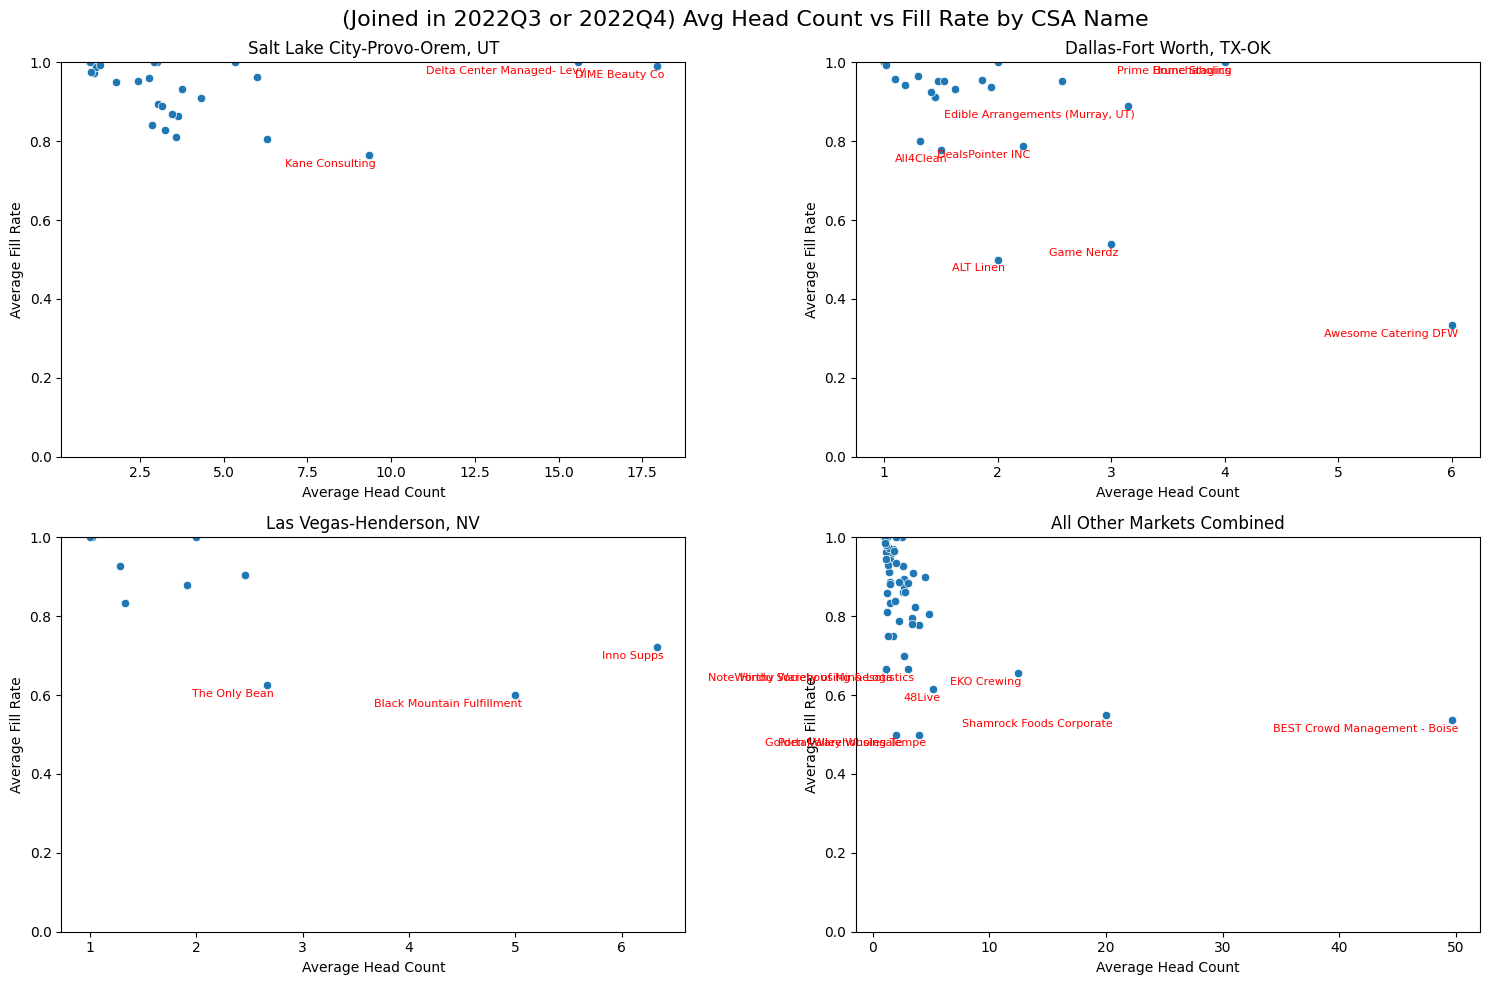

In [48]:
# Step 2: Filter the DataFrame
filtered_df = df[((df['year_quarter_comp_start'] == '2022Q3') | (df['year_quarter_comp_start'] == '2022Q4')) & 
                  (df['csa_name_mod2'].isin(['Salt Lake City-Provo-Orem, UT', 'Dallas-Fort Worth, TX-OK', 'Las Vegas-Henderson, NV', 'All Other Markets Combined']))]

# Step 3: Create four scatter plots using Seaborn
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed

# Scatter plot for Salt Lake City-Provo-Orem, UT
plt.subplot(2, 2, 1)
sns.scatterplot(x='avg_head_count', y='fill_rate', data=filtered_df[filtered_df['csa_name_mod2'] == 'Salt Lake City-Provo-Orem, UT'])
plt.title('Salt Lake City-Provo-Orem, UT')
plt.ylim(0, 1)  # Set y-axis limits
plt.ylabel('Average Fill Rate')
plt.xlabel('Average Head Count')
# Label points for 'Salt Lake City-Provo-Orem, UT'
for index, row in filtered_df[filtered_df['csa_name_mod2'] == 'Salt Lake City-Provo-Orem, UT'].iterrows():
    if (row['fill_rate'] < .8) or (row['avg_head_count'] > 7.5):
        plt.annotate(row['company_name'], 
                     xy=(row['avg_head_count'], row['fill_rate']),
                     xytext=(5, -10),  # Adjust the position of the label
                     textcoords='offset points',
                     ha='right', va='bottom',  # Adjust the alignment
                     fontsize=8, color='red')

# Scatter plot for Dallas-Fort Worth, TX-OK
plt.subplot(2, 2, 2)
sns.scatterplot(x='avg_head_count', y='fill_rate', data=filtered_df[filtered_df['csa_name_mod2'] == 'Dallas-Fort Worth, TX-OK'])
plt.title('Dallas-Fort Worth, TX-OK')
plt.ylim(0, 1)  # Set y-axis limits
plt.ylabel('Average Fill Rate')
plt.xlabel('Average Head Count')
# Label points for 'Salt Lake City-Provo-Orem, UT'
for index, row in filtered_df[filtered_df['csa_name_mod2'] == 'Dallas-Fort Worth, TX-OK'].iterrows():
    if (row['fill_rate'] < .8) or (row['avg_head_count'] > 3):
        plt.annotate(row['company_name'], 
                     xy=(row['avg_head_count'], row['fill_rate']),
                     xytext=(5, -10),  # Adjust the position of the label
                     textcoords='offset points',
                     ha='right', va='bottom',  # Adjust the alignment
                     fontsize=8, color='red')

# Scatter plot for Las Vegas-Henderson, NV
plt.subplot(2, 2, 3)
sns.scatterplot(x='avg_head_count', y='fill_rate', data=filtered_df[filtered_df['csa_name_mod2'] == 'Las Vegas-Henderson, NV'])
plt.title('Las Vegas-Henderson, NV')
plt.ylim(0, 1)  # Set y-axis limits
plt.ylabel('Average Fill Rate')
plt.xlabel('Average Head Count')
for index, row in filtered_df[filtered_df['csa_name_mod2'] == 'Las Vegas-Henderson, NV'].iterrows():
    if (row['fill_rate'] < .7) or (row['avg_head_count'] > 3):
        plt.annotate(row['company_name'], 
                     xy=(row['avg_head_count'], row['fill_rate']),
                     xytext=(5, -10),  # Adjust the position of the label
                     textcoords='offset points',
                     ha='right', va='bottom',  # Adjust the alignment
                     fontsize=8, color='red')

# Scatter plot for All Other Markets Combined
plt.subplot(2, 2, 4)
sns.scatterplot(x='avg_head_count', y='fill_rate', data=filtered_df[filtered_df['csa_name_mod2'] == 'All Other Markets Combined'])
plt.title('All Other Markets Combined')
plt.ylim(0, 1)  # Set y-axis limits
plt.ylabel('Average Fill Rate')
plt.xlabel('Average Head Count')
for index, row in filtered_df[filtered_df['csa_name_mod2'] == 'All Other Markets Combined'].iterrows():
    if row['fill_rate'] < 0.7:
        plt.annotate(row['company_name'], 
                     xy=(row['avg_head_count'], row['fill_rate']),
                     xytext=(5, -10),  # Adjust the position of the label
                     textcoords='offset points',
                     ha='right', va='bottom',  # Adjust the alignment
                     fontsize=8, color='red')

# Add a title to the entire set of graphs
plt.suptitle('(Joined in 2022Q3 or 2022Q4) Avg Head Count vs Fill Rate by CSA Name', fontsize=16)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

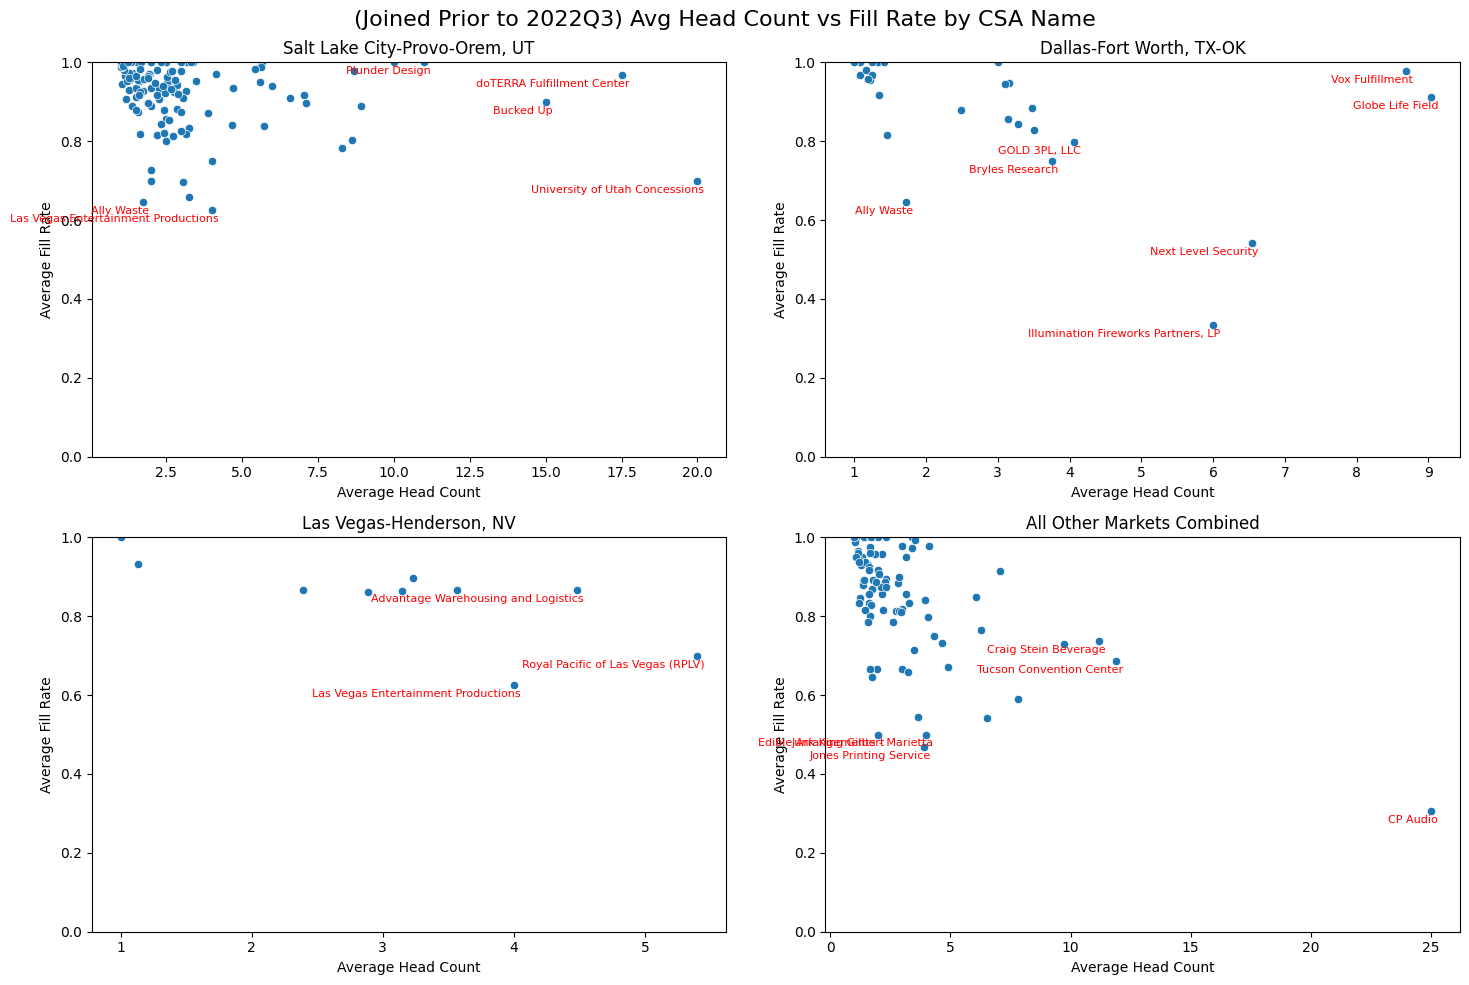

In [59]:
# Step 2: Filter the DataFrame
filtered_df = df[(df['year_quarter_comp_start'] < '2022Q3') & (df['csa_name_mod2'].isin(['Salt Lake City-Provo-Orem, UT', 'Dallas-Fort Worth, TX-OK', 'Las Vegas-Henderson, NV', 'All Other Markets Combined']))]

# Step 3: Create four scatter plots using Seaborn
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed

# Scatter plot for Salt Lake City-Provo-Orem, UT
plt.subplot(2, 2, 1)
sns.scatterplot(x='avg_head_count', y='fill_rate', data=filtered_df[filtered_df['csa_name_mod2'] == 'Salt Lake City-Provo-Orem, UT'])
plt.title('Salt Lake City-Provo-Orem, UT')
plt.ylim(0, 1)  # Set y-axis limits
plt.ylabel('Average Fill Rate')
plt.xlabel('Average Head Count')
for index, row in filtered_df[filtered_df['csa_name_mod2'] == 'Salt Lake City-Provo-Orem, UT'].iterrows():
    if (row['fill_rate'] < .65) or (row['avg_head_count'] > 10):
        plt.annotate(row['company_name'], 
                     xy=(row['avg_head_count'], row['fill_rate']),
                     xytext=(5, -10),  # Adjust the position of the label
                     textcoords='offset points',
                     ha='right', va='bottom',  # Adjust the alignment
                     fontsize=8, color='red')


# Scatter plot for Dallas-Fort Worth, TX-OK
plt.subplot(2, 2, 2)
sns.scatterplot(x='avg_head_count', y='fill_rate', data=filtered_df[filtered_df['csa_name_mod2'] == 'Dallas-Fort Worth, TX-OK'])
plt.title('Dallas-Fort Worth, TX-OK')
plt.ylim(0, 1)  # Set y-axis limits
plt.ylabel('Average Fill Rate')
plt.xlabel('Average Head Count')
for index, row in filtered_df[filtered_df['csa_name_mod2'] == 'Dallas-Fort Worth, TX-OK'].iterrows():
    if (row['fill_rate'] < .8) or (row['avg_head_count'] > 5):
        plt.annotate(row['company_name'], 
                     xy=(row['avg_head_count'], row['fill_rate']),
                     xytext=(5, -10),  # Adjust the position of the label
                     textcoords='offset points',
                     ha='right', va='bottom',  # Adjust the alignment
                     fontsize=8, color='red')

# Scatter plot for Las Vegas-Henderson, NV
plt.subplot(2, 2, 3)
sns.scatterplot(x='avg_head_count', y='fill_rate', data=filtered_df[filtered_df['csa_name_mod2'] == 'Las Vegas-Henderson, NV'])
plt.title('Las Vegas-Henderson, NV')
plt.ylim(0, 1)  # Set y-axis limits
plt.ylabel('Average Fill Rate')
plt.xlabel('Average Head Count')
for index, row in filtered_df[filtered_df['csa_name_mod2'] == 'Las Vegas-Henderson, NV'].iterrows():
    if (row['fill_rate'] < .7) or (row['avg_head_count'] > 4):
        plt.annotate(row['company_name'], 
                     xy=(row['avg_head_count'], row['fill_rate']),
                     xytext=(5, -10),  # Adjust the position of the label
                     textcoords='offset points',
                     ha='right', va='bottom',  # Adjust the alignment
                     fontsize=8, color='red')

# Scatter plot for All Other Markets Combined
plt.subplot(2, 2, 4)
sns.scatterplot(x='avg_head_count', y='fill_rate', data=filtered_df[filtered_df['csa_name_mod2'] == 'All Other Markets Combined'])
plt.title('All Other Markets Combined')
plt.ylim(0, 1)  # Set y-axis limits
plt.ylabel('Average Fill Rate')
plt.xlabel('Average Head Count')
for index, row in filtered_df[filtered_df['csa_name_mod2'] == 'All Other Markets Combined'].iterrows():
    if (row['fill_rate'] < .53) or (row['avg_head_count'] > 11):
        plt.annotate(row['company_name'], 
                     xy=(row['avg_head_count'], row['fill_rate']),
                     xytext=(5, -10),  # Adjust the position of the label
                     textcoords='offset points',
                     ha='right', va='bottom',  # Adjust the alignment
                     fontsize=8, color='red')

# Add a title to the entire set of graphs
plt.suptitle('(Joined Prior to 2022Q3) Avg Head Count vs Fill Rate by CSA Name', fontsize=16)

# Adjust layout
plt.tight_layout()


# Show the plot
plt.show()


# Correlation Heatmap

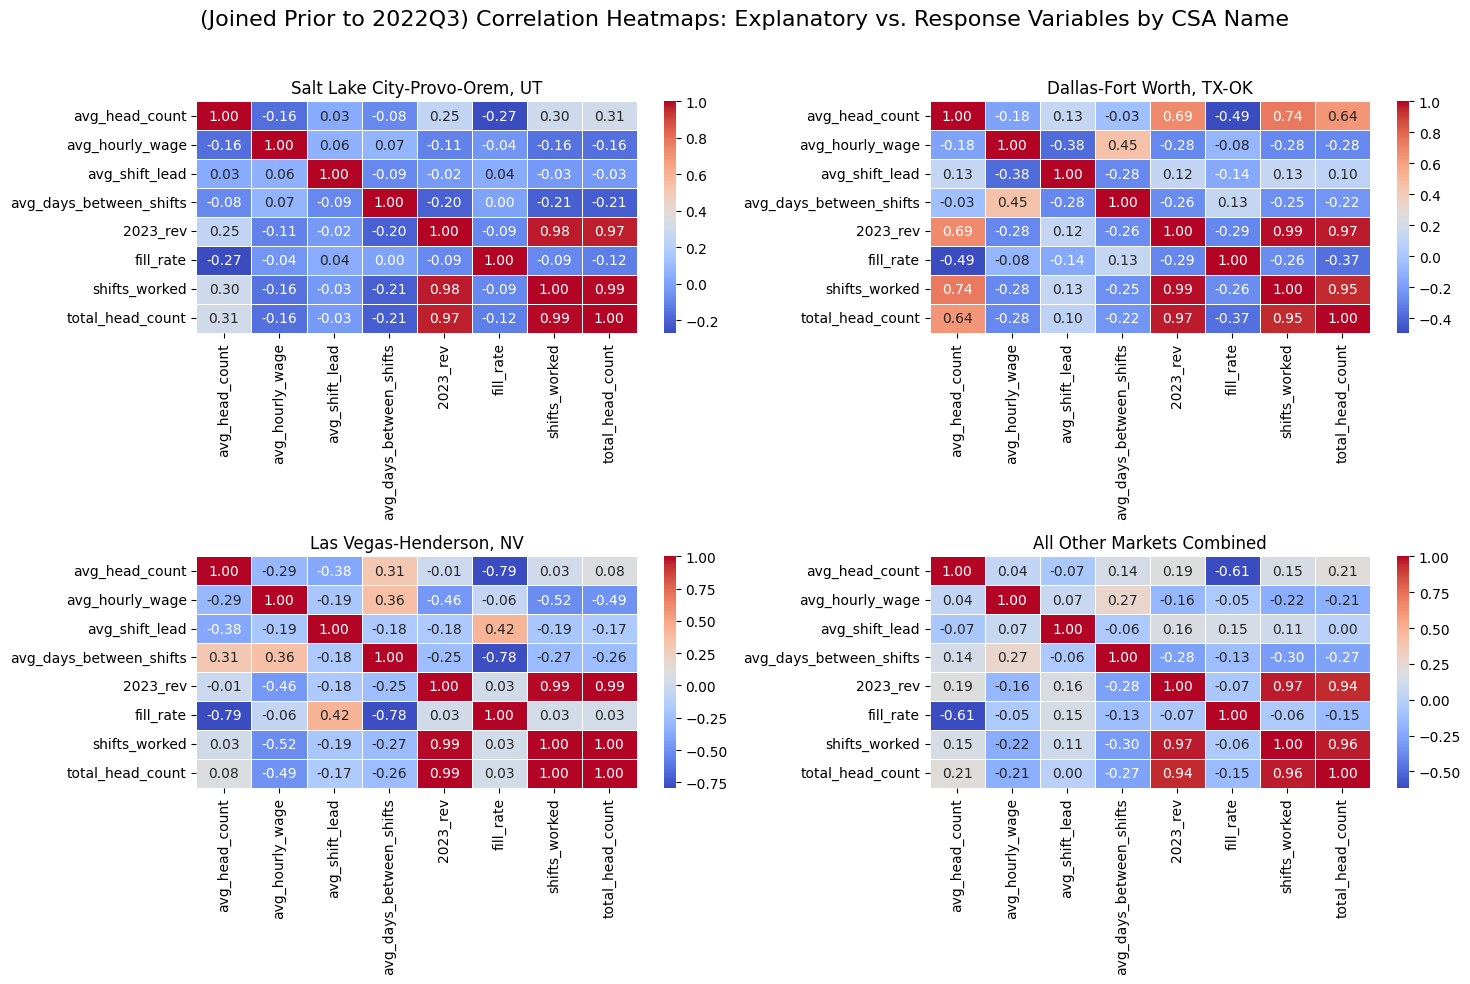

In [17]:
# Define explanatory and response variables
explanatory_vars = ['avg_head_count', 'avg_hourly_wage', 'avg_shift_lead', 'avg_days_between_shifts']
response_vars = ['2023_rev', 'fill_rate', 'shifts_worked', 'total_head_count']

# Filter the DataFrame
filtered_df = df[(df['year_quarter_comp_start'] < '2022Q3') & 
                  (df['csa_name_mod2'].isin(['Salt Lake City-Provo-Orem, UT', 'Dallas-Fort Worth, TX-OK', 'Las Vegas-Henderson, NV', 'All Other Markets Combined']))]

# Create subplots for each market
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Correlation heatmap for Salt Lake City-Provo-Orem, UT
salt_lake_df = filtered_df[filtered_df['csa_name_mod2'] == 'Salt Lake City-Provo-Orem, UT']
corr_salt_lake = salt_lake_df[explanatory_vars + response_vars].corr()
sns.heatmap(corr_salt_lake, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=axes[0, 0])
axes[0, 0].set_title('Salt Lake City-Provo-Orem, UT')

# Correlation heatmap for Dallas-Fort Worth, TX-OK
dallas_df = filtered_df[filtered_df['csa_name_mod2'] == 'Dallas-Fort Worth, TX-OK']
corr_dallas = dallas_df[explanatory_vars + response_vars].corr()
sns.heatmap(corr_dallas, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=axes[0, 1])
axes[0, 1].set_title('Dallas-Fort Worth, TX-OK')

# Correlation heatmap for Las Vegas-Henderson, NV
las_vegas_df = filtered_df[filtered_df['csa_name_mod2'] == 'Las Vegas-Henderson, NV']
corr_las_vegas = las_vegas_df[explanatory_vars + response_vars].corr()
sns.heatmap(corr_las_vegas, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=axes[1, 0])
axes[1, 0].set_title('Las Vegas-Henderson, NV')

# Correlation heatmap for All Other Markets Combined
other_markets_df = filtered_df[filtered_df['csa_name_mod2'] == 'All Other Markets Combined']
corr_other_markets = other_markets_df[explanatory_vars + response_vars].corr()
sns.heatmap(corr_other_markets, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=axes[1, 1])
axes[1, 1].set_title('All Other Markets Combined')

# Add a title to the entire set of heatmaps
fig.suptitle('(Joined Prior to 2022Q3) Correlation Heatmaps: Explanatory vs. Response Variables by CSA Name', fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()


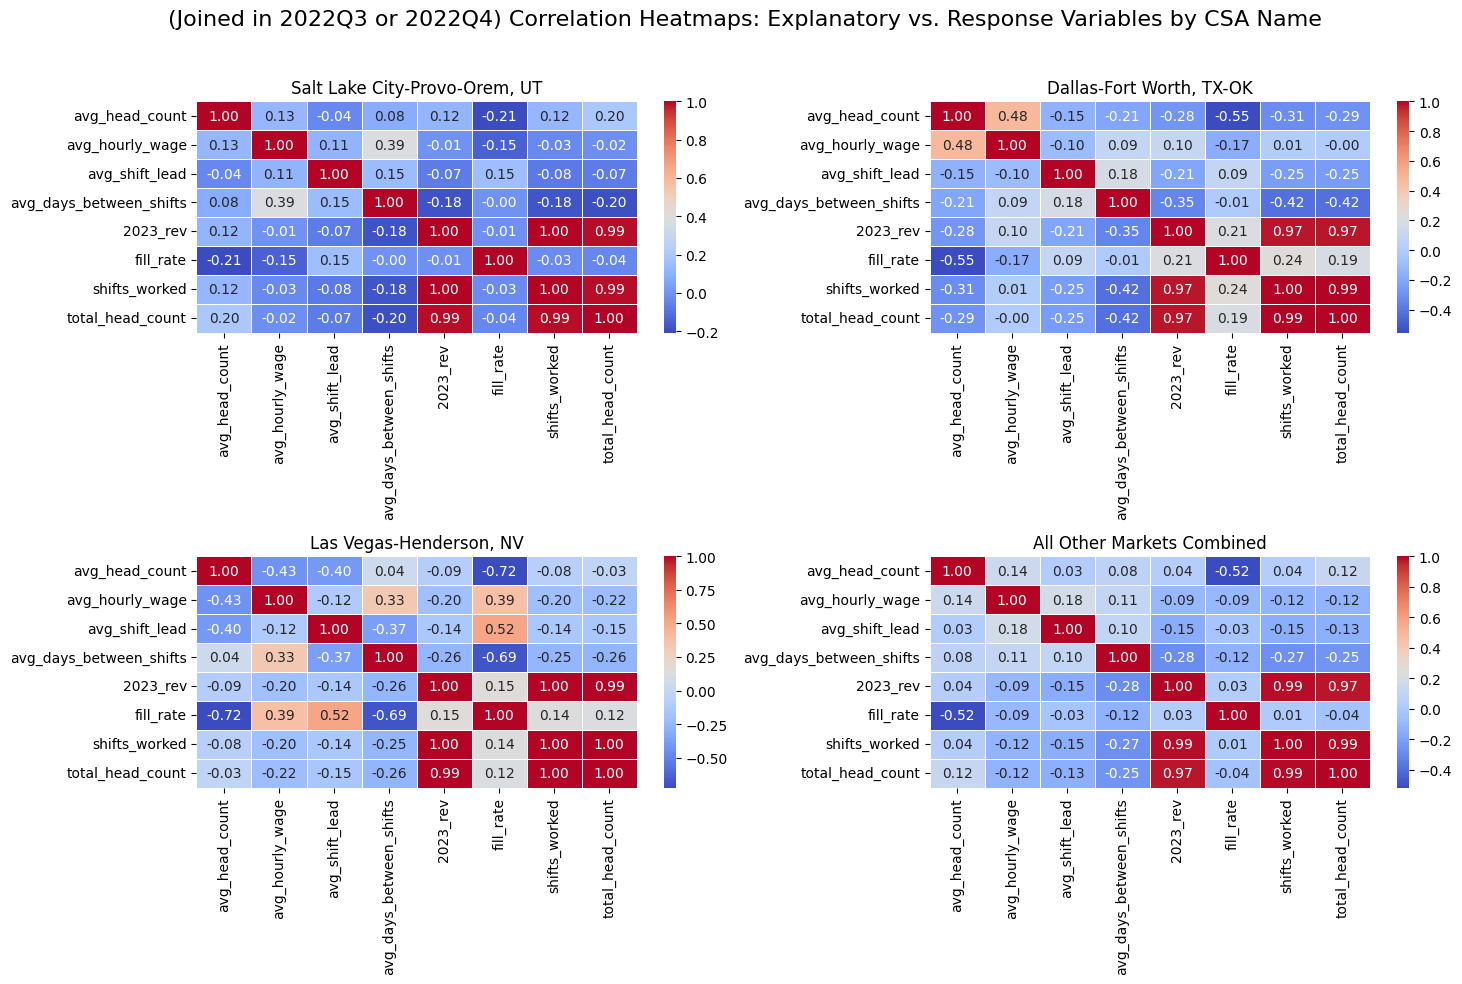

In [18]:
# Define explanatory and response variables
explanatory_vars = ['avg_head_count', 'avg_hourly_wage', 'avg_shift_lead', 'avg_days_between_shifts']
response_vars = ['2023_rev', 'fill_rate', 'shifts_worked', 'total_head_count']

# Filter the DataFrame
filtered_df = df[((df['year_quarter_comp_start'] == '2022Q3') | (df['year_quarter_comp_start'] == '2022Q4')) & 
                  (df['csa_name_mod2'].isin(['Salt Lake City-Provo-Orem, UT', 'Dallas-Fort Worth, TX-OK', 'Las Vegas-Henderson, NV', 'All Other Markets Combined']))]

# Create subplots for each market
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Correlation heatmap for Salt Lake City-Provo-Orem, UT
salt_lake_df = filtered_df[filtered_df['csa_name_mod2'] == 'Salt Lake City-Provo-Orem, UT']
corr_salt_lake = salt_lake_df[explanatory_vars + response_vars].corr()
sns.heatmap(corr_salt_lake, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=axes[0, 0])
axes[0, 0].set_title('Salt Lake City-Provo-Orem, UT')

# Correlation heatmap for Dallas-Fort Worth, TX-OK
dallas_df = filtered_df[filtered_df['csa_name_mod2'] == 'Dallas-Fort Worth, TX-OK']
corr_dallas = dallas_df[explanatory_vars + response_vars].corr()
sns.heatmap(corr_dallas, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=axes[0, 1])
axes[0, 1].set_title('Dallas-Fort Worth, TX-OK')

# Correlation heatmap for Las Vegas-Henderson, NV
las_vegas_df = filtered_df[filtered_df['csa_name_mod2'] == 'Las Vegas-Henderson, NV']
corr_las_vegas = las_vegas_df[explanatory_vars + response_vars].corr()
sns.heatmap(corr_las_vegas, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=axes[1, 0])
axes[1, 0].set_title('Las Vegas-Henderson, NV')

# Correlation heatmap for All Other Markets Combined
other_markets_df = filtered_df[filtered_df['csa_name_mod2'] == 'All Other Markets Combined']
corr_other_markets = other_markets_df[explanatory_vars + response_vars].corr()
sns.heatmap(corr_other_markets, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=axes[1, 1])
axes[1, 1].set_title('All Other Markets Combined')

# Add a title to the entire set of heatmaps
fig.suptitle('(Joined in 2022Q3 or 2022Q4) Correlation Heatmaps: Explanatory vs. Response Variables by CSA Name', fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()


# Average Head Count vs Revenue

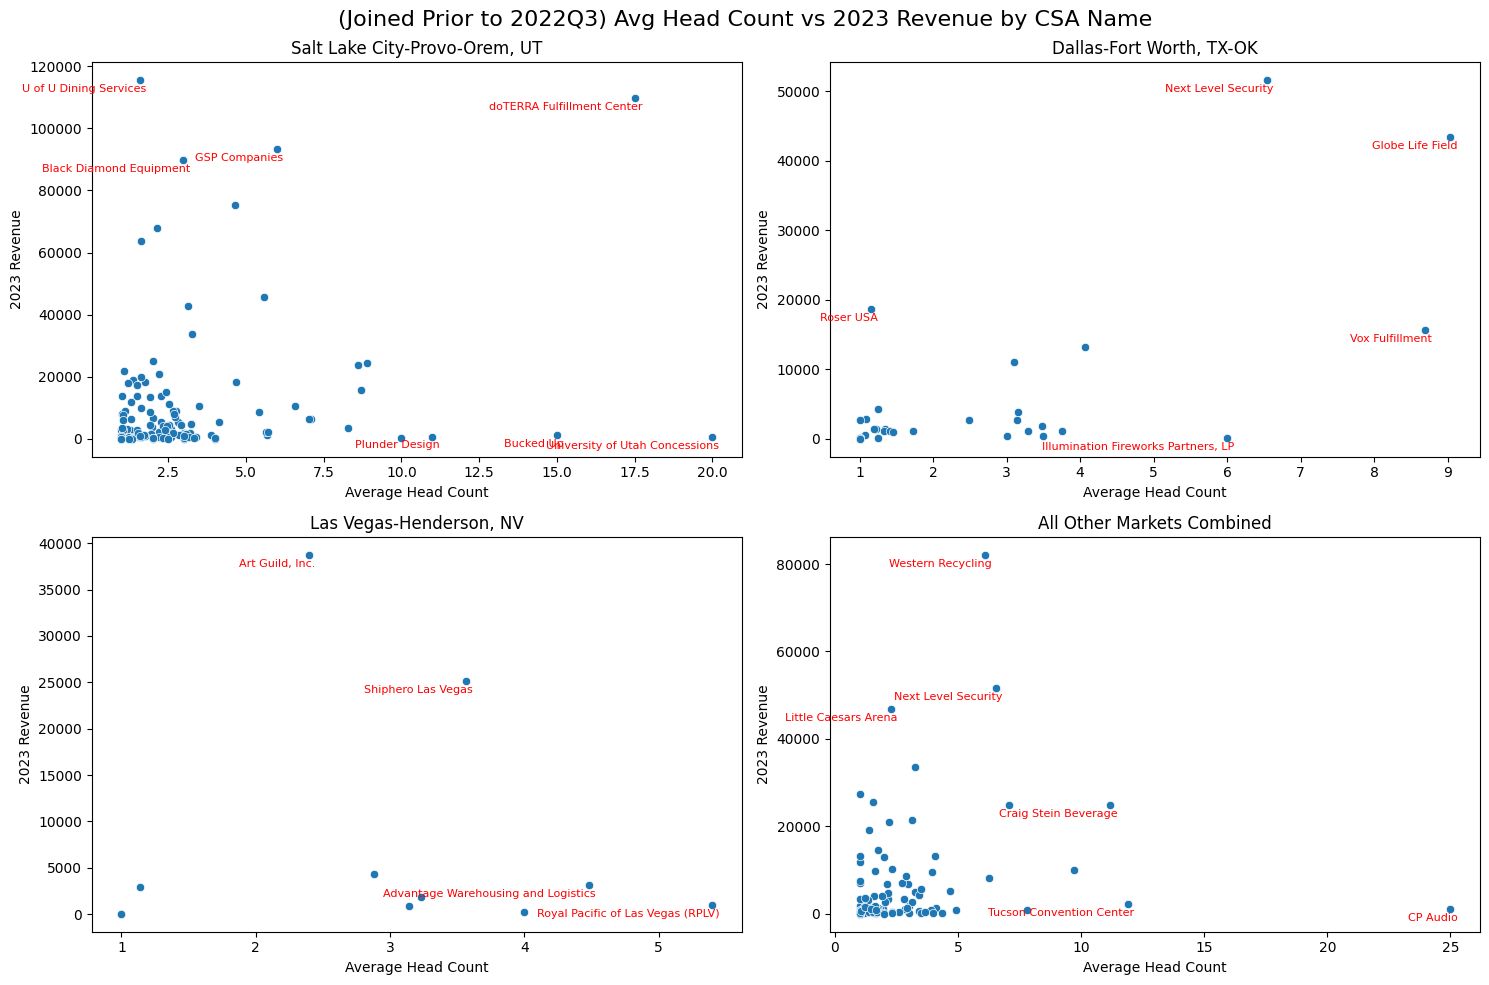

In [39]:
import numpy as np
# Step 2: Filter the DataFrame
filtered_df = df[(df['year_quarter_comp_start'] < '2022Q3') & (df['csa_name_mod2'].isin(['Salt Lake City-Provo-Orem, UT', 'Dallas-Fort Worth, TX-OK', 'Las Vegas-Henderson, NV', 'All Other Markets Combined']))]

# Step 3: Create four scatter plots using Seaborn
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed

plt.subplot(2, 2, 1)
sns.scatterplot(x='avg_head_count', y='2023_rev', data=filtered_df[filtered_df['csa_name_mod2'] == 'Salt Lake City-Provo-Orem, UT'])
plt.title('Salt Lake City-Provo-Orem, UT')
plt.ylabel('2023 Revenue')
plt.xlabel('Average Head Count')
# Label points for 'Salt Lake City-Provo-Orem, UT'
for index, row in filtered_df[filtered_df['csa_name_mod2'] == 'Salt Lake City-Provo-Orem, UT'].iterrows():
    if (row['2023_rev'] > 80000) or (row['avg_head_count'] > 10):
        plt.annotate(row['company_name'], 
                     xy=(row['avg_head_count'], row['2023_rev']),
                     xytext=(5, -10),  # Adjust the position of the label
                     textcoords='offset points',
                     ha='right', va='bottom',  # Adjust the alignment
                     fontsize=8, color='red')

# Scatter plot for Dallas-Fort Worth, TX-OK
plt.subplot(2, 2, 2)
sns.scatterplot(x='avg_head_count', y='2023_rev', data=filtered_df[filtered_df['csa_name_mod2'] == 'Dallas-Fort Worth, TX-OK'])
plt.title('Dallas-Fort Worth, TX-OK')
plt.ylabel('2023 Revenue')
plt.xlabel('Average Head Count')
for index, row in filtered_df[filtered_df['csa_name_mod2'] == 'Dallas-Fort Worth, TX-OK'].iterrows():
    if (row['2023_rev'] > 15000) or (row['avg_head_count'] > 5):
        plt.annotate(row['company_name'], 
                     xy=(row['avg_head_count'], row['2023_rev']),
                     xytext=(5, -10),  # Adjust the position of the label
                     textcoords='offset points',
                     ha='right', va='bottom',  # Adjust the alignment
                     fontsize=8, color='red')

# Scatter plot for Las Vegas-Henderson, NV
plt.subplot(2, 2, 3)
sns.scatterplot(x='avg_head_count', y='2023_rev', data=filtered_df[filtered_df['csa_name_mod2'] == 'Las Vegas-Henderson, NV'])
plt.title('Las Vegas-Henderson, NV')
plt.ylabel('2023 Revenue')
plt.xlabel('Average Head Count')
for index, row in filtered_df[filtered_df['csa_name_mod2'] == 'Las Vegas-Henderson, NV'].iterrows():
    if (row['2023_rev'] > 20000) or (row['avg_head_count'] > 4):
        plt.annotate(row['company_name'], 
                     xy=(row['avg_head_count'], row['2023_rev']),
                     xytext=(5, -10),  # Adjust the position of the label
                     textcoords='offset points',
                     ha='right', va='bottom',  # Adjust the alignment
                     fontsize=8, color='red')

# Scatter plot for All Other Markets Combined
plt.subplot(2, 2, 4)
sns.scatterplot(x='avg_head_count', y='2023_rev', data=filtered_df[filtered_df['csa_name_mod2'] == 'All Other Markets Combined'])
plt.title('All Other Markets Combined')
plt.ylabel('2023 Revenue')
plt.xlabel('Average Head Count')
for index, row in filtered_df[filtered_df['csa_name_mod2'] == 'All Other Markets Combined'].iterrows():
    if (row['2023_rev'] > 40000) or (row['avg_head_count'] > 10):
        plt.annotate(row['company_name'], 
                     xy=(row['avg_head_count'], row['2023_rev']),
                     xytext=(5, -10),  # Adjust the position of the label
                     textcoords='offset points',
                     ha='right', va='bottom',  # Adjust the alignment
                     fontsize=8, color='red')

# Add a title to the entire set of graphs
plt.suptitle('(Joined Prior to 2022Q3) Avg Head Count vs 2023 Revenue by CSA Name', fontsize=16)

# Adjust layout
plt.tight_layout()


# Show the plot
plt.show()

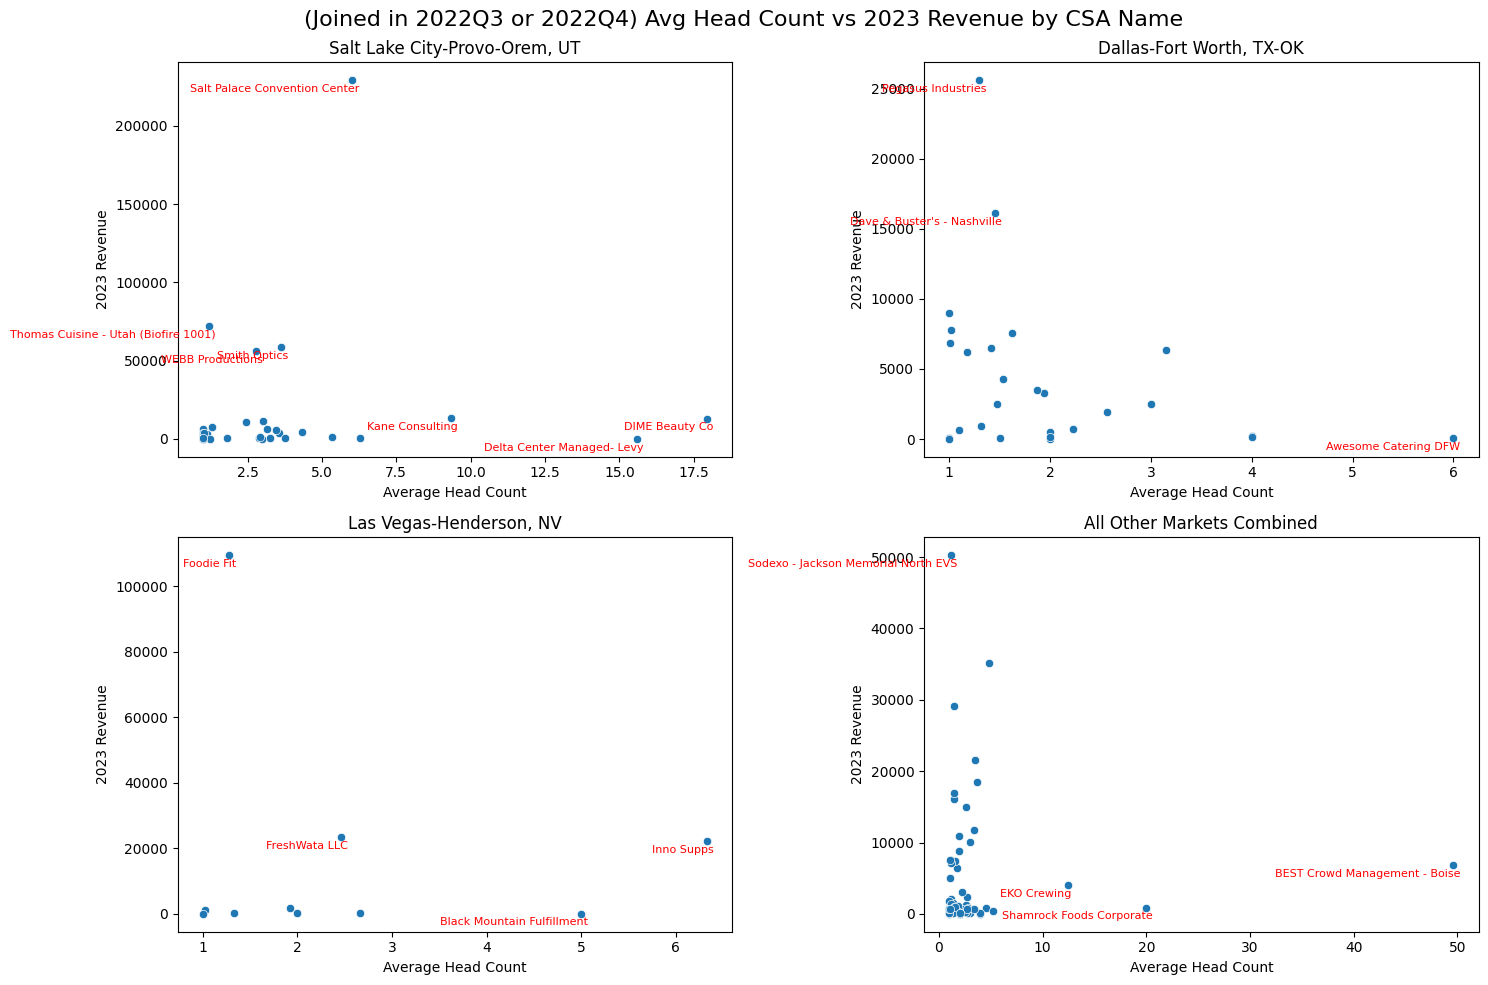

In [44]:
# Step 2: Filter the DataFrame
filtered_df = df[((df['year_quarter_comp_start'] == '2022Q3') | (df['year_quarter_comp_start'] == '2022Q4')) & 
                  (df['csa_name_mod2'].isin(['Salt Lake City-Provo-Orem, UT', 'Dallas-Fort Worth, TX-OK', 'Las Vegas-Henderson, NV', 'All Other Markets Combined']))]

# Step 3: Create four scatter plots using Seaborn
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed

plt.subplot(2, 2, 1)
sns.scatterplot(x='avg_head_count', y='2023_rev', data=filtered_df[filtered_df['csa_name_mod2'] == 'Salt Lake City-Provo-Orem, UT'])
plt.title('Salt Lake City-Provo-Orem, UT')
plt.ylabel('2023 Revenue')
plt.xlabel('Average Head Count')
# Label points for 'Salt Lake City-Provo-Orem, UT'
for index, row in filtered_df[filtered_df['csa_name_mod2'] == 'Salt Lake City-Provo-Orem, UT'].iterrows():
    if (row['2023_rev'] > 50000) or (row['avg_head_count'] > 7.5):
        plt.annotate(row['company_name'], 
                     xy=(row['avg_head_count'], row['2023_rev']),
                     xytext=(5, -10),  # Adjust the position of the label
                     textcoords='offset points',
                     ha='right', va='bottom',  # Adjust the alignment
                     fontsize=8, color='red')

# Scatter plot for Dallas-Fort Worth, TX-OK
plt.subplot(2, 2, 2)
sns.scatterplot(x='avg_head_count', y='2023_rev', data=filtered_df[filtered_df['csa_name_mod2'] == 'Dallas-Fort Worth, TX-OK'])
plt.title('Dallas-Fort Worth, TX-OK')
plt.ylabel('2023 Revenue')
plt.xlabel('Average Head Count')
for index, row in filtered_df[filtered_df['csa_name_mod2'] == 'Dallas-Fort Worth, TX-OK'].iterrows():
    if (row['2023_rev'] > 15000) or (row['avg_head_count'] > 4):
        plt.annotate(row['company_name'], 
                     xy=(row['avg_head_count'], row['2023_rev']),
                     xytext=(5, -10),  # Adjust the position of the label
                     textcoords='offset points',
                     ha='right', va='bottom',  # Adjust the alignment
                     fontsize=8, color='red')

# Scatter plot for Las Vegas-Henderson, NV
plt.subplot(2, 2, 3)
sns.scatterplot(x='avg_head_count', y='2023_rev', data=filtered_df[filtered_df['csa_name_mod2'] == 'Las Vegas-Henderson, NV'])
plt.title('Las Vegas-Henderson, NV')
plt.ylabel('2023 Revenue')
plt.xlabel('Average Head Count')
for index, row in filtered_df[filtered_df['csa_name_mod2'] == 'Las Vegas-Henderson, NV'].iterrows():
    if (row['2023_rev'] > 20000) or (row['avg_head_count'] > 4):
        plt.annotate(row['company_name'], 
                     xy=(row['avg_head_count'], row['2023_rev']),
                     xytext=(5, -10),  # Adjust the position of the label
                     textcoords='offset points',
                     ha='right', va='bottom',  # Adjust the alignment
                     fontsize=8, color='red')

# Scatter plot for All Other Markets Combined
plt.subplot(2, 2, 4)
sns.scatterplot(x='avg_head_count', y='2023_rev', data=filtered_df[filtered_df['csa_name_mod2'] == 'All Other Markets Combined'])
plt.title('All Other Markets Combined')
plt.ylabel('2023 Revenue')
plt.xlabel('Average Head Count')
for index, row in filtered_df[filtered_df['csa_name_mod2'] == 'All Other Markets Combined'].iterrows():
    if (row['2023_rev'] > 40000) or (row['avg_head_count'] > 10):
        plt.annotate(row['company_name'], 
                     xy=(row['avg_head_count'], row['2023_rev']),
                     xytext=(5, -10),  # Adjust the position of the label
                     textcoords='offset points',
                     ha='right', va='bottom',  # Adjust the alignment
                     fontsize=8, color='red')

# Add a title to the entire set of graphs
plt.suptitle('(Joined in 2022Q3 or 2022Q4) Avg Head Count vs 2023 Revenue by CSA Name', fontsize=16)

# Adjust layout
plt.tight_layout()


# Show the plot
plt.show()